In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures


In [128]:
def plotData(x,y,label="Train",title="Raw Data"):
    """
    Plots data points
    """
    sns.scatterplot(x=x[:, 0], y=y, label=label)
    plt.title(title)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.xlim(-0.1, 1.1)
    plt.ylim(-200, 200)
    plt.legend()
    
def evaluate(model, X, y):
    """
    Evaluates a model on the test set using mean squared error
    """
    y_pred = model.predict(X)
    score = mean_squared_error(y, y_pred)
    return score

def plotLinearRegressionCurve(model,X,transfomer=None):
    """
    Plots linear regression curve and data points with specified model, data and transformer
    """
    X_transformed = transfomer.transform(X) if transfomer is not None else X # transform data if transformer is not None
    y_pred = model.predict(X_transformed) # predict target values
    sns.scatterplot(x=X[:, 0], y=y_pred, label="Train Predictions",color="red",)
   
    

    X = np.linspace(-3, 3, 100).reshape(-1, 1) # generate 100 data points between -3 and 3
    X_transformed = transfomer.transform(X) if transfomer is not None else X # transform data if transformer is not None
    y_pred = model.predict(X_transformed)
    # plot linear regression curve
    sns.lineplot(
        x=X[:, 0],
        y=y_pred, 
        color="red", 
        label="Regression Line"
        )
    plt.legend()

    plt.title("Predictions")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.xlim(-0.1, 1.1)
    plt.ylim(-200, 200)


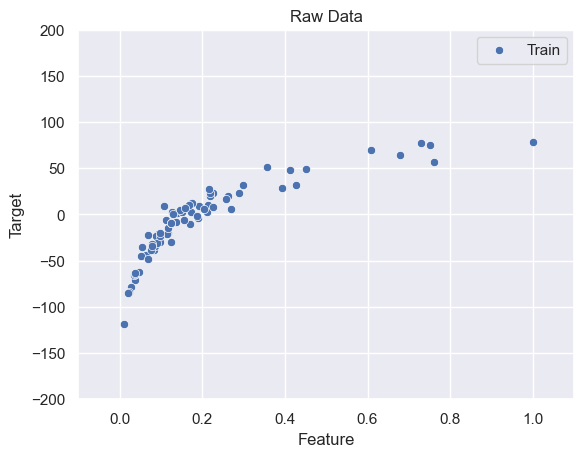

In [129]:
# generate data for regression 
X, y = make_regression(
    n_samples=100, # 50 data points
    n_features=1, # 1 feature
    noise=10, # noise
    random_state=42 # random seed
    )
X = X-min(X) # transform data
X = np.exp(X) # transform data
X = X/max(X) # transform data

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plotData(X_train, y_train)

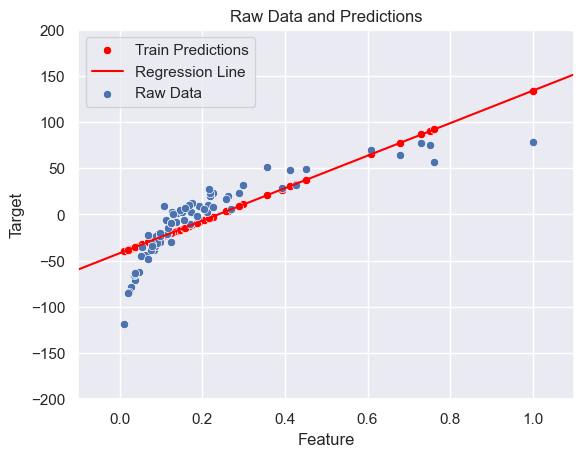

In [130]:
# fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# plot training data and predictions
plotLinearRegressionCurve(model, X_train)
plotData(X_train, y_train, label="Raw Data", title="Raw Data and Predictions")


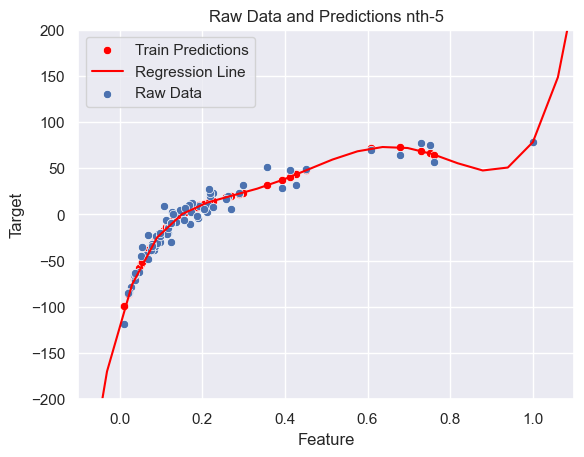

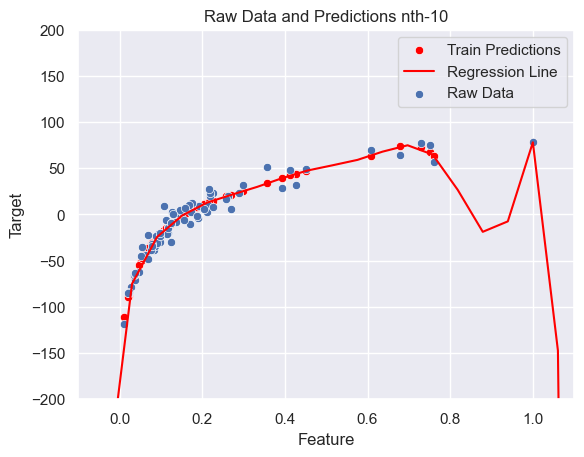

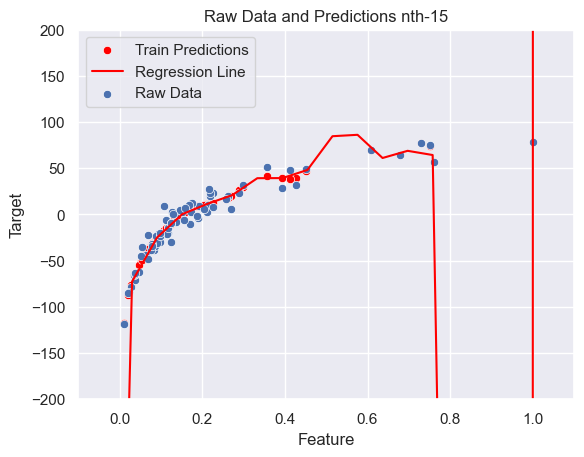

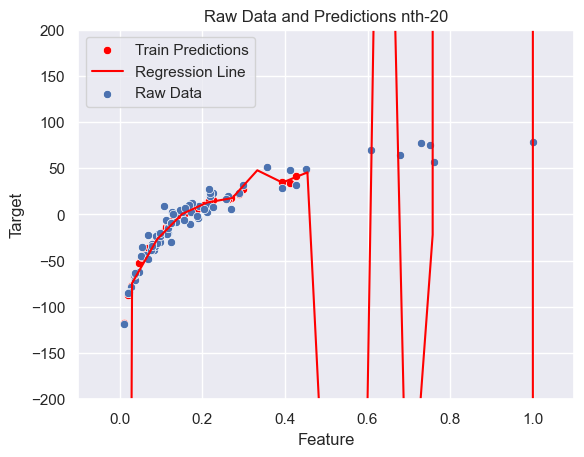

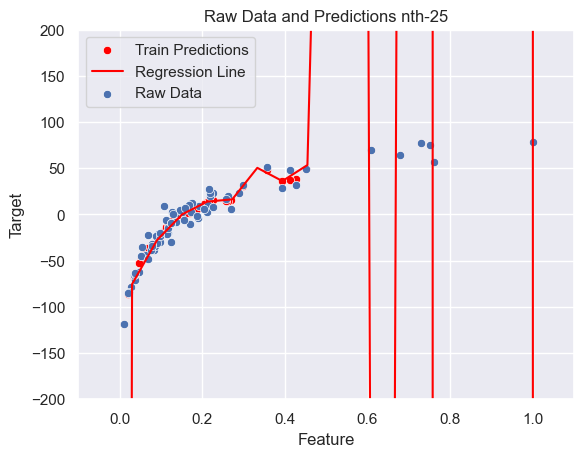

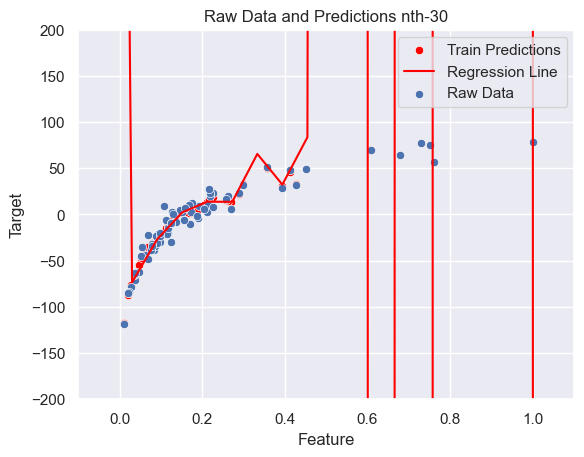

In [131]:
results = []

for degree in range(2,31,1):
    # generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    # fit linear regression model on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    # get predictions for training data
    # plot training data and predictions
    if degree % 5 == 0:
        plotLinearRegressionCurve(model, X_train, transfomer=poly)
        plotData(X_train, y_train, label="Raw Data", title=f"Raw Data and Predictions nth-{degree}")
        plt.show()



    # evaluate model on training data
    train_score = evaluate(model, X_train_poly, y_train)
    # evaluate model on testing data
    X_test_poly = poly.transform(X_test)
    test_score = evaluate(model, X_test_poly, y_test)
    # append results to dataframe
    results.append(
        {
            "degree": degree,
            "train_score": train_score,
            "test_score": test_score,
        }
    )


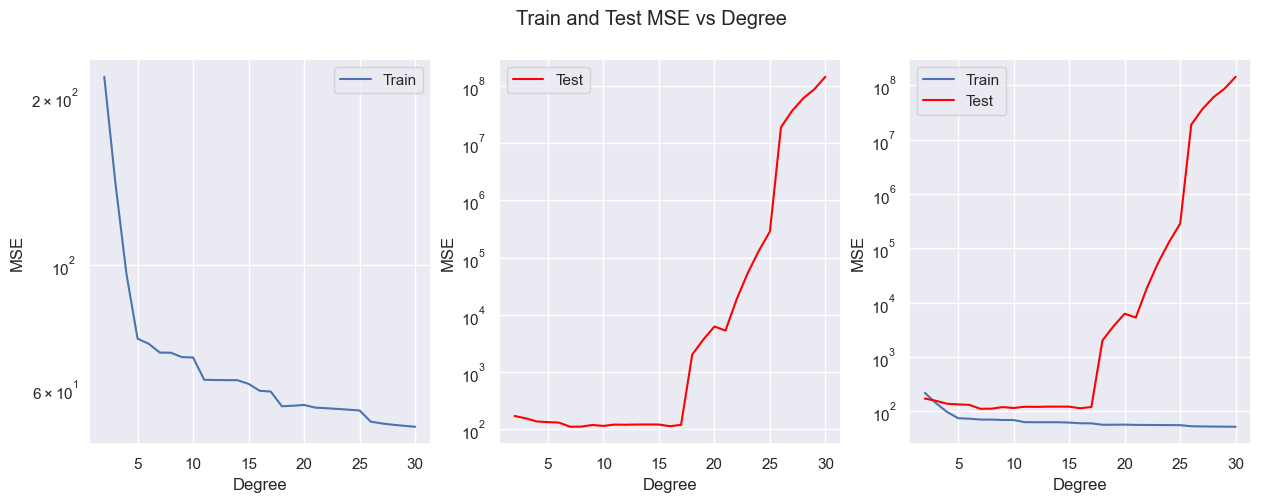

In [134]:
results = pd.DataFrame(results)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.lineplot(x="degree", y="train_score", data=results, label="Train")
# sns.lineplot(x="degree", y="test_score", data=results, label="Test")
plt.ylabel("MSE")
# set y-axis to log scale
plt.yscale("log")
plt.xlabel("Degree")
plt.legend()
plt.subplot(1, 3, 2)
sns.lineplot(x="degree", y="test_score", data=results, label="Test",color="red")
plt.ylabel("MSE")
# set y-axis to log scale
plt.yscale("log")
plt.xlabel("Degree")
plt.legend()

plt.subplot(1, 3, 3)
sns.lineplot(x="degree", y="train_score", data=results, label="Train")
sns.lineplot(x="degree", y="test_score", data=results, label="Test",color="red")
plt.ylabel("MSE")
# set y-axis to log scale
plt.yscale("log")
plt.xlabel("Degree")
plt.legend()
plt.suptitle("Train and Test MSE vs Degree")
plt.show()
